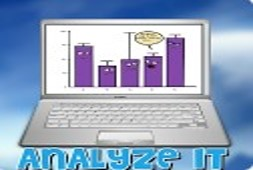

Nael Jean-Baptiste  (aka analyze-it) created this Jupyter notebook project as a support document for a youtube video that explains how to partition a dataset using an optimum number of clusters.  This project shows how to determine the optimum cluster number using the K-Means unsupervised Machine Learning.  It specifically walks you through the inertia calculation and the elbow method with a practical example of how to compute the optimum number of clusters for K-Means. 

You can view the  video  here : https://www.youtube.com/watch?v=c23PMItdRfQ&t=3s&ab_channel=AnalyzeIt

#   What K-Means does ? 

* Unsupervised ML algorithm that identifies subgroups in your dataset. 

* Finds homogeneous subgroups within your dataset such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance.


#  Inertia measurement and what it does ?  

* Measures how coherent the different clusters are

* It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.


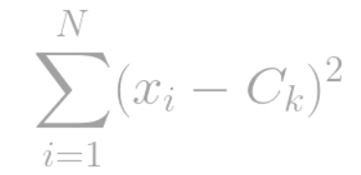

#  How to use inertia   to find the optimum number of cluster ?  

* A good model is one with low inertia AND a low number of cluster (K). However, this is a tradeoff because as K increases, inertia decreases. 

* Elbow method:  Compute inertia for different  K then make a graph to find the point where the decrease in inertia begins to slow.


## 1) Importing the necessary libraries

Let's start by importing the necessary libraries for this project. A must library is pandas which allow data manipulation with the dataframe . I'm importing  NumPy because  I will work with Numerical values and arrays. Seaborn will be used for data visualization and  it is based on matplotlib. Lastly,  I will import Sklearn and the cluster module to run the K-Means algorithm. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 2) Loading and viewing the Dataset

Seaborn comes with a few important datasets in the library. When Seaborn is installed, the datasets download automatically.
You can use any of these datasets for your learning. In this project, I will dowlaod a dataset named penguins as df and view the first five rows. 

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 3) Simple Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is used to analyze, investigate and summarize the dataset's main characteristics. EDA will give you a better sense of what data transformation and shaping are necessary before running an ML. In this project, I will check the dataset's size and the data type in each column and check if there are missing values.

In [4]:
df.shape  # finding the size of the dataset 

(344, 7)

In [5]:
df.dtypes # finding the type of data in each column 

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [6]:
df.isnull().sum() # finding the number of missing values in each column 

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

## 4) Features engineering 

A feature is an individual measurable property or characteristic of a phenomenon. In our dataset, each column is a feature. Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in Machine Learning. 
 
In this project, I'm selecting  two features (bill_lenght_mm and flipper_length_mm) to do the clustering. However,  each feature contains two missing values. So it is essential to dropping the row containing the missing values.

As K-Means involves measuring euclidian distance, it is vital to ensure that selected features are on the same scale. If not, data normalization must be performed to change the values of numeric columns (features)  to a common scale. In this project, I will not do such a transformation because the selected features are both in the same scale (millimeter). 

In [7]:
df = df.dropna(axis = 0)  # dropping all row with missing values

In [8]:
X = np.asarray(df[['bill_length_mm','flipper_length_mm']])  # Selecting features and converting into numpy array

## 5) Computing inertia for each number of clusters

In Python, the for loop is used to run a block of code a certain number of times.  In this project, I'm creating  a block of code to compute the inertia for a K-Means algorithm that has been fit to my selected features. I will run this block of codes for a number of cluster (K) starting from  0 to 10. 

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


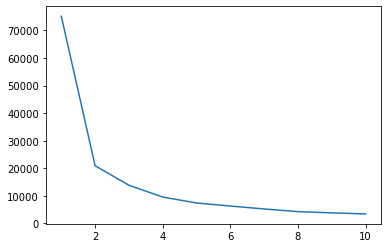

In [9]:
# Creating a variable which is an empty list that store the inertia for each K 

inertia = []

#  for loop 

for a in range (1,11):                 #  a for loop that will iterate over a value ranging from 1 to 10 (K)
    cluster = KMeans (n_clusters = a)  #  instance of K-Means
    cluster.fit(X)                     #  Fitting the instance of K-Means to selected features
    inertia.append (cluster.inertia_)  #  computing and adding the inertias to the empty list 

# Creating a list of number of clusters from 1 to 10

k = list(range(1,11))

# Plotting number of clusters and the computed inertias

sns.lineplot(x = k , y =inertia)
plt.show()

         

When we plot the inertia with the K value, the plot looks like an Elbow. As the number of clusters increases, the inertia value starts to decrease. Inertia value is larger when K = 1. When we analyze the graph, we can see the graph rapidly changes at a point, thus creating an elbow shape. From this point,  the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal K or an optimal number of clusters.   In this project, the plot indicates that 2 is the optimum K. 

In [10]:
# printing the list of inertia values 

print (inertia)

[75147.53933933935, 20949.7853112782, 13858.94307215541, 9587.135276652696, 7428.7287039282555, 6331.756597278278, 5263.730566131204, 4300.385108815875, 3846.0804273654926, 3469.2006485889733]


## 6)  Locating the elbow point using a  package locator

Sometimes,  the elbow point may not be easily detectable when reading a chart. To help this identification, you use the python kneed package. Given x and y arrays, kneed attempts to identify the knee/elbow point of a line fit to the data. The knee/elbow is defined as the point of the line with maximum curvature.

In this project, Kneed locator has confirmed that 2 is the optimum number.


For additional information on this package : https://kneed.readthedocs.io/en/stable/

In [11]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")

opt = kl.elbow

print('The optimun number of cluster is' , opt, 'with an inertia value of ',inertia [1])

The optimun number of cluster is 2 with an inertia value of  20949.7853112782


## 7) K-Means with the optimum number of K and assigning each data point to a cluster

Now let's run the K-Means clustering with the optimum number by setting the parameter n_clusters =2.  In this project, all other parameters are intentionally not specified; therefore, Sklearn will be run with the default values.   For assigning a row to a cluster, we will use the attributes  labels_

For more info on sklearn K-mean algorithm : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [12]:
# K-Means with optimun K 

clustering = KMeans (n_clusters = 2)
clustering.fit(X)

KMeans(n_clusters=2)

In [13]:
# assigning  each data point (row) to a cluster

df['cluster'] = clustering.labels_
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1


##  8) Getting basic statisctic descriptive for the features in each cluster

In [25]:
# Creating a subset containing the features and the cluster

df1 = df[['bill_length_mm','flipper_length_mm','cluster']]         

The groupby is one of the most frequently used Pandas functions in data analysis. It is used for grouping the data points (i.e. rows) based on the distinct values in the given column or columns. In this project, we will be grouping df1 by cluster then apply the descriptive functions

In [24]:
#  getting means value of each feature for each cluster

df1.groupby('cluster').mean()

,bill_length_mm,flipper_length_mm
cluster,,
0,41.486000,190.870000
1,47.762406,216.150376


In [26]:
#  getting maximum value of each feature for each cluster

df1.groupby('cluster').max()

,bill_length_mm,flipper_length_mm
cluster,,
0,58.0,203.0
1,59.6,231.0


In [27]:
#  getting minimum value of each feature for each cluster

df1.groupby('cluster').min()

,bill_length_mm,flipper_length_mm
cluster,,
0,32.1,172.0
1,40.8,203.0


In [28]:
# getting the coordinate of cluster centers

clustering.cluster_centers_

array([[ 41.486     , 190.87      ],
       [ 47.76240602, 216.15037594]])

## 9) Vizualizing clusters

Text(0.5, 1.0, ' with cluster')

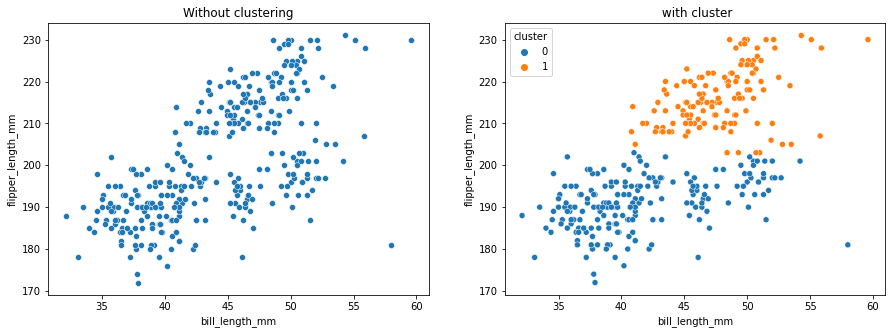

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='bill_length_mm', y='flipper_length_mm').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='bill_length_mm', y='flipper_length_mm',hue='cluster').set_title(" with cluster")